In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pymysql
import plotly.express as px

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("pastel")
# sns.palplot(palette)

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# SQL DB연결&데이터프레임 변환 함수

In [4]:
def SQL_load(sql):
    # db접속
    db=pymysql.connect(host='localhost',port=3306,user='root',
                   passwd='661400',db='plt',charset='utf8',
                  cursorclass=pymysql.cursors.DictCursor)
    
    cs=db.cursor()
    
    cs.execute(sql)

    res=cs.fetchall()

    df=pd.DataFrame(res)
    
    db.close()
    return df

In [127]:
rfmc=SQL_load('''select * from plt.rfm order by mx;''')

In [175]:
rfmc.describe()

,customerid,Recency,Frequency,Monetary,ATV,churn_yn,labels
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,15351.901220,83.819024,4.103171,1970.464523,69.646421,0.312439,0.778293
std,1690.184748,89.811971,7.195919,8771.701779,1509.669700,0.463544,0.758053
min,12346.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13893.750000,17.000000,1.000000,302.355000,11.960000,0.000000,0.000000
50%,15355.500000,46.000000,2.000000,658.235000,17.554500,0.000000,1.000000
75%,16805.250000,127.000000,4.000000,1599.862500,24.447069,1.000000,1.000000
max,18287.000000,339.000000,188.000000,271614.140000,77183.600000,1.000000,2.000000


In [212]:
rfmc['m']=rfmc['mx'].str[5:7]

In [128]:
rfmc

,customerid,mx,Recency,Frequency,Monetary,ATV,churn_yn
0,16282.0,2011-01-04 11:42,339,1,168.30,15.300000,1
1,15266.0,2011-01-05 13:40,338,1,119.30,19.883333,1
2,15464.0,2011-01-05 15:56,338,1,1048.85,6.680573,1
3,12386.0,2011-01-06 12:37,337,1,143.00,71.500000,1
4,13187.0,2011-01-06 18:57,337,1,236.02,6.378919,1
...,...,...,...,...,...,...,...
4095,17389.0,2011-12-09 9:38,0,34,31833.68,149.453897,0
4096,17001.0,2011-12-09 9:38,0,10,3591.61,22.876497,0
4097,15694.0,2011-12-09 9:44,0,11,5632.07,86.647231,0
4098,17428.0,2011-12-09 9:45,0,26,16362.90,53.825329,0


In [129]:
rfmc[rfmc['churn_yn']==1]

,customerid,mx,Recency,Frequency,Monetary,ATV,churn_yn
0,16282.0,2011-01-04 11:42,339,1,168.30,15.300000,1
1,15266.0,2011-01-05 13:40,338,1,119.30,19.883333,1
2,15464.0,2011-01-05 15:56,338,1,1048.85,6.680573,1
3,12386.0,2011-01-06 12:37,337,1,143.00,71.500000,1
4,13187.0,2011-01-06 18:57,337,1,236.02,6.378919,1
...,...,...,...,...,...,...,...
1276,14915.0,2011-09-09 13:34,91,2,307.48,25.623333,1
1277,15652.0,2011-09-09 14:22,91,1,337.74,16.082857,1
1278,14628.0,2011-09-09 14:58,91,2,671.96,27.998333,1
1279,12535.0,2011-09-09 8:48,91,2,716.35,21.069118,1


In [130]:
rfmc[rfmc['churn_yn']!=1]

,customerid,mx,Recency,Frequency,Monetary,ATV,churn_yn
1281,14837.0,2011-09-11 10:58,89,4,1649.50,15.273148,0
1282,12635.0,2011-09-11 11:04,89,2,1689.18,16.724554,0
1283,15035.0,2011-09-11 11:08,89,1,252.73,9.360370,0
1284,15636.0,2011-09-11 11:17,89,2,724.76,28.990400,0
1285,16384.0,2011-09-11 11:19,89,2,584.50,17.712121,0
...,...,...,...,...,...,...,...
4095,17389.0,2011-12-09 9:38,0,34,31833.68,149.453897,0
4096,17001.0,2011-12-09 9:38,0,10,3591.61,22.876497,0
4097,15694.0,2011-12-09 9:44,0,11,5632.07,86.647231,0
4098,17428.0,2011-12-09 9:45,0,26,16362.90,53.825329,0


# Recency

In [ ]:
sns.scatterplot(data=rfmc)

In [66]:
fig=px.histogram(rfmc,x='Recency',marginal='box',color = "churn_yn")
fig.show()

# Frequency

In [65]:
fig=px.histogram(rfmc,x='Frequency',marginal='box',color = "churn_yn")
fig.show()

# Monetary

In [67]:
fig=px.histogram(rfmc,x='Monetary',marginal='box',color = "churn_yn")
fig.show()

# ATV

In [120]:
fig=px.histogram(rfmc,x='ATV',marginal='box',color = "churn_yn")
fig.show()

# (x)

In [68]:
fig = px.scatter_3d(rfmc, 
                    z = "Recency",
                    y = 'Frequency',
                    x = 'Monetary',
                    color="churn_yn",
                   size=s,opacity=1)
fig.show()

# 고객세그먼트 기반 군집

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.cm as cm
import math

In [51]:
def visualize_silhouette(cluster_lists, X_features): 
    

    
    # 클러스터링 갯수리스트
    n_cols = len(cluster_lists)
    
    
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    
    for ind, n_cluster in enumerate(cluster_lists):
        
       
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# 변수 변환

In [159]:
lt=pd.DataFrame(x).apply(lambda x:np.log1p(x)).values

In [138]:
x=rfmc.iloc[:,2:-2].values

In [139]:
x

array([[3.39000000e+02, 1.00000000e+00, 1.68300000e+02, 1.53000000e+01],
       [3.38000000e+02, 1.00000000e+00, 1.19300000e+02, 1.98833333e+01],
       [3.38000000e+02, 1.00000000e+00, 1.04885000e+03, 6.68057325e+00],
       ...,
       [0.00000000e+00, 1.10000000e+01, 5.63207000e+03, 8.66472308e+01],
       [0.00000000e+00, 2.60000000e+01, 1.63629000e+04, 5.38253289e+01],
       [0.00000000e+00, 8.00000000e+00, 1.73828000e+03, 4.13876190e+01]])

In [140]:
def trans_x(features,trans='s'):
    if trans=='s':
        scaled=StandardScaler().fit_transform(features)
    else:
        scaled=MinMaxScaler().fit_transform(features)
    return scaled

In [141]:
std=trans_x(x)
mm=trans_x(x,'m')

In [142]:
std

array([[ 2.84162675, -0.43129295, -0.20547716, -0.03600327],
       [ 2.83049102, -0.43129295, -0.21106398, -0.03296692],
       [ 2.83049102, -0.43129295, -0.1050796 , -0.04171345],
       ...,
       [-0.93338613,  0.95855307,  0.41748479,  0.01126265],
       [-0.93338613,  3.04332211,  1.64098043, -0.01048112],
       [-0.93338613,  0.54159927, -0.02647295, -0.01872082]])

In [143]:
mm

array([[1.00000000e+00, 0.00000000e+00, 6.19629008e-04, 1.98228639e-04],
       [9.97050147e-01, 0.00000000e+00, 4.39226029e-04, 2.57610857e-04],
       [9.97050147e-01, 0.00000000e+00, 3.86154417e-03, 8.65543101e-05],
       ...,
       [0.00000000e+00, 5.34759358e-02, 2.07355552e-02, 1.12261194e-03],
       [0.00000000e+00, 1.33689840e-01, 6.02431817e-02, 6.97367432e-04],
       [0.00000000e+00, 3.74331551e-02, 6.39981409e-03, 5.36222968e-04]])

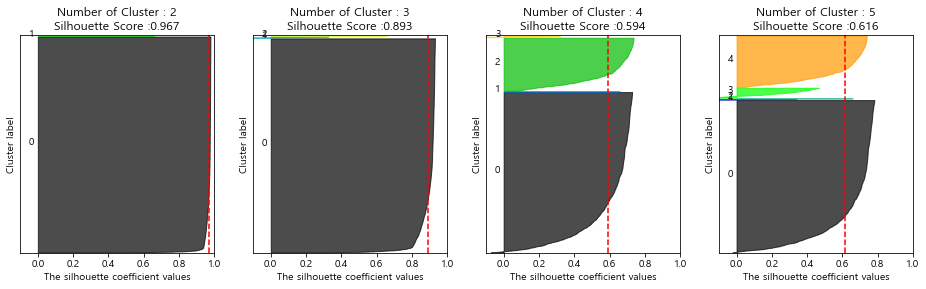

In [144]:
visualize_silhouette([2,3,4,5],std)

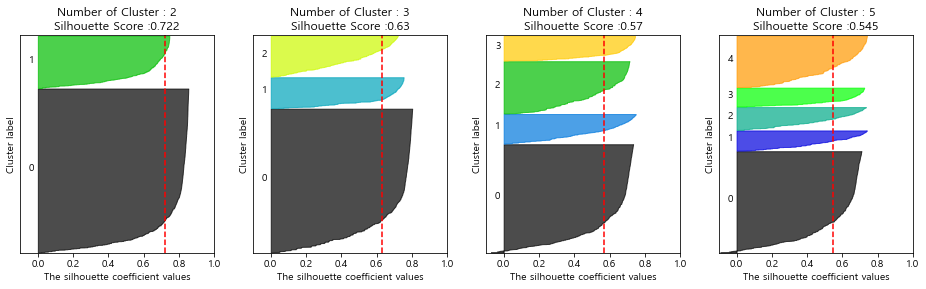

In [145]:
visualize_silhouette([2,3,4,5],mm)

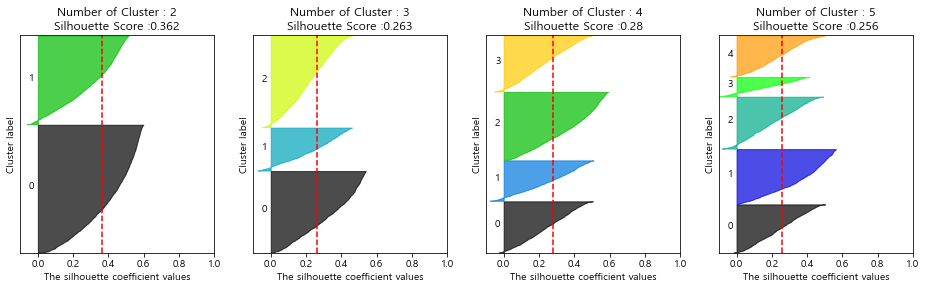

In [160]:
visualize_silhouette([2,3,4,5],lt)

In [170]:
kmeans=KMeans(n_clusters=3)
labels=kmeans.fit_predict(lt)

In [171]:
labels

array([1, 1, 1, ..., 2, 2, 2])

In [172]:
rfmc['labels']=labels

In [173]:
fig = px.scatter_3d(rfmc, 
                    z = "Recency",
                    y = 'Frequency',
                    x = 'Monetary',
                    color="labels",
                   size=s,opacity=1)
fig.show()

In [150]:
c0=rfmc[rfmc['labels']==0]
c1=rfmc[rfmc['labels']==1]
c2=rfmc[rfmc['labels']==2]
c3=rfmc[rfmc['labels']==3]

In [111]:
c0.describe()

,customerid,Recency,Frequency,Monetary,ATV,churn_yn,labels
count,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.0,2063.0
mean,15369.901115,18.401842,6.111003,3121.782919,58.005410,0.0,0.0
std,1701.781665,13.074098,9.587000,12036.788244,1240.670676,0.0,0.0
min,12356.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0
25%,13940.500000,7.000000,2.000000,485.520000,10.031426,0.0,0.0
50%,15406.000000,17.000000,4.000000,1122.380000,17.231261,0.0,0.0
75%,16872.000000,29.000000,7.000000,2530.755000,23.443542,0.0,0.0
max,18287.000000,47.000000,188.000000,271614.140000,56157.500000,0.0,0.0


In [107]:
c1.describe()

,customerid,Recency,Frequency,Monetary,ATV,churn_yn,labels
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.0,567.0
mean,15465.728395,173.594356,1.878307,675.155240,63.976820,1.0,1.0
std,1704.365640,29.041724,1.328276,1832.473783,576.687135,0.0,0.0
min,12378.000000,126.000000,1.000000,19.800000,2.656932,1.0,1.0
25%,14001.000000,149.000000,1.000000,190.015000,12.528688,1.0,1.0
50%,15433.000000,173.000000,1.000000,349.100000,18.022941,1.0,1.0
75%,16959.000000,197.500000,2.000000,696.145000,25.500000,1.0,1.0
max,18281.000000,226.000000,10.000000,39916.500000,13305.500000,1.0,1.0


In [108]:
c2.describe()

,customerid,Recency,Frequency,Monetary,ATV,churn_yn,labels
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.0
mean,15288.891784,75.933868,2.586172,972.074441,33.352637,0.242485,2.0
std,1651.557440,20.346291,2.056886,1139.903164,100.835449,0.428801,0.0
min,12379.000000,47.000000,1.000000,6.200000,2.547049,0.000000,2.0
25%,13854.250000,59.000000,1.000000,311.802500,14.198281,0.000000,2.0
50%,15305.000000,72.000000,2.000000,615.190000,18.302683,0.000000,2.0
75%,16663.250000,89.000000,3.000000,1197.365000,26.076936,0.000000,2.0
max,18278.000000,124.000000,17.000000,11581.800000,2033.100000,1.000000,2.0


In [109]:
c3.describe()

,customerid,Recency,Frequency,Monetary,ATV,churn_yn,labels
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.0,472.0
mean,15269.718220,278.569915,1.207627,605.345487,204.077072,1.0,3.0
std,1698.794482,31.200458,0.540607,4090.431603,3557.106691,0.0,0.0
min,12346.000000,227.000000,1.000000,3.750000,2.241000,1.0,3.0
25%,13752.500000,252.750000,1.000000,151.200000,12.905833,1.0,3.0
50%,15232.000000,275.000000,1.000000,265.275000,17.227212,1.0,3.0
75%,16701.750000,306.000000,1.000000,414.010000,24.763736,1.0,3.0
max,18280.000000,339.000000,5.000000,77183.600000,77183.600000,1.0,3.0


In [112]:
mean0=c0.describe().iloc[1,1:5]
mean1=c1.describe().iloc[1,1:5]
mean2=c2.describe().iloc[1,1:5]
mean3=c3.describe().iloc[1,1:5]

In [114]:
clusters_mean=pd.DataFrame({'cluster0':mean0,
             'cluster1':mean1,
             'cluster2':mean2,
             'cluster3':mean3})

In [ ]:
0번 군집은 Frequency와 Monetary가 높은 집단
1번 군집은 Frequency가 낮고,Recency가 높은 편.
2번 군집은 Monetary가 높지만,ATV가 낮음.
3번 군집은 Recency와 ATV가 높은 집단

In [117]:
clusters_mean.style.background_gradient(cmap = "PuBu",axis=1)

,cluster0,cluster1,cluster2,cluster3
Recency,18.401842,173.594356,75.933868,278.569915
Frequency,6.111003,1.878307,2.586172,1.207627
Monetary,3121.782919,675.155240,972.074441,605.345487
ATV,58.005410,63.976820,33.352637,204.077072
